<a href="https://colab.research.google.com/github/kiranmahara9600/Car-Price-Prediction-car-dekho-/blob/main/Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project : Prediction using Linear Regression**

##**Objective :  To predict the most probable car prices with the use of basic linear regression model**

In [1]:
#importing all the required libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
#importing all the required libraries for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
#to ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting drive in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading car details from car dekho csv file and storing it in cardekho_cardetails_data dataframe
file_path = '/content/drive/MyDrive/Datascience/Datasets/'
cardekho_cardetails_data = pd.read_csv(file_path + 'CAR DETAILS FROM CAR DEKHO.csv')

##**Data Preprocessing**

In [4]:
#----------------------------------Block 1--------------------------------------

#checking for the dimension of cardekho_cardetails_data
cardekho_cardetails_data.shape   

(4340, 8)

*So, the data has 4340 observations and 8 features*

In [5]:
#----------------------------------Block 2--------------------------------------

#1st five observations of cardekho_cardetails_data
cardekho_cardetails_data.head()   

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Here, we can see the **name** column consists of model name with their brands. So, we can split this column to form two separate columns, one is **brand** and another is **model**

In [6]:
#----------------------------------Block 3--------------------------------------

#checking for duplicate rows
print('Number of duplicate observations in the data : ',cardekho_cardetails_data.duplicated().sum()) 

Number of duplicate observations in the data :  763


In [7]:
#----------------------------------Block 4--------------------------------------

#dropping the duplicated rows
cardekho_cardetails_data.drop_duplicates(inplace = True)   

In [8]:
#checking for the dimension of cardekho_cardetails_data after dropping duplicated observations
cardekho_cardetails_data.shape   

(3577, 8)

In [9]:
#----------------------------------Block 5--------------------------------------

#defining a function splitnme_getbrand to get name of the brand from 'name' column
def splitnme_getbrand(x):
  y=x.split(' ')   #splitting a string by ' ' to get list of words 
  return y[0]   #returning first word from the list which is a name of brand

In [10]:
#----------------------------------Block 6--------------------------------------

#creating a new feature 'brand' using the function defined in Block 5
cardekho_cardetails_data['brand'] = cardekho_cardetails_data['name'].apply(splitnme_getbrand)

In [11]:
#----------------------------------Block 7--------------------------------------

#defining a function splitnme_getmodel to get model name from 'name' column
def splitnme_getmodel(x):
  y=x.split(' ')   #splitting a string by ' ' to get list of words 
  return y[1]   #returning second word from the list which is a name of model

In [12]:
#----------------------------------Block 8--------------------------------------

#creating a new feature 'model' using the function defined in Block 7
cardekho_cardetails_data['model'] = cardekho_cardetails_data['name'].apply(splitnme_getmodel)

In [13]:
#----------------------------------Block 9--------------------------------------

cardekho_cardetails_data.head()   #checking for 1st five rows after creating new features

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze


In [14]:
#----------------------------------Block 10--------------------------------------

for col in ['name','brand','model']:   #iterating over list 
   print(f'Number of unique values of {col} is : ',cardekho_cardetails_data[col].nunique())   #no. of unique values for features of the list

Number of unique values of name is :  1491
Number of unique values of brand is :  29
Number of unique values of model is :  185


*we have data of 3577 unique observations, and 1491 unique values for name feature, the given data would be quite less to learn all the patterns for this large no. of values of name feature and as **brand** and **model** are created from this **name** feature itself and unique values for these both also not that large, so we can use these both features instead of name feature to learn the patterns, So Let's drop 'name' feature.*

In [15]:
#----------------------------------Block 11--------------------------------------

cardekho_cardetails_data.drop(columns='name',inplace=True)   #dropping feature 'name'

In [16]:
#----------------------------------Block 12--------------------------------------

cardekho_cardetails_data.info()   #to get basic information of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           3577 non-null   int64 
 1   selling_price  3577 non-null   int64 
 2   km_driven      3577 non-null   int64 
 3   fuel           3577 non-null   object
 4   seller_type    3577 non-null   object
 5   transmission   3577 non-null   object
 6   owner          3577 non-null   object
 7   brand          3577 non-null   object
 8   model          3577 non-null   object
dtypes: int64(3), object(6)
memory usage: 279.5+ KB


*Okay, no any null value in the data*

**Data Dictionary**

* *year - year in which the car was bought*
* *km_driven - distance travelled by the car in km since it bought*
* *fuel - type of fuel car uses (Petrol, Diesel, CNG, LPG, Electric)*
* *seller_type - whether the seller is a dealer or an individual*
* *transmission -  car is manual or automatic*
* *owner - number of owners the car previously had*
* *brand - brand of the car*
* *model - model of the car*
* *selling_price - selling price of the car*


##**Feature analysis**

*Let's divide these features into independent and dependent variables*

In [17]:
#----------------------------------Block 13--------------------------------------

Y = ['selling_price']   #dependent variable
X = list(set(cardekho_cardetails_data.columns)- set(Y))   #independent variable

* *Dependent variable analysis*

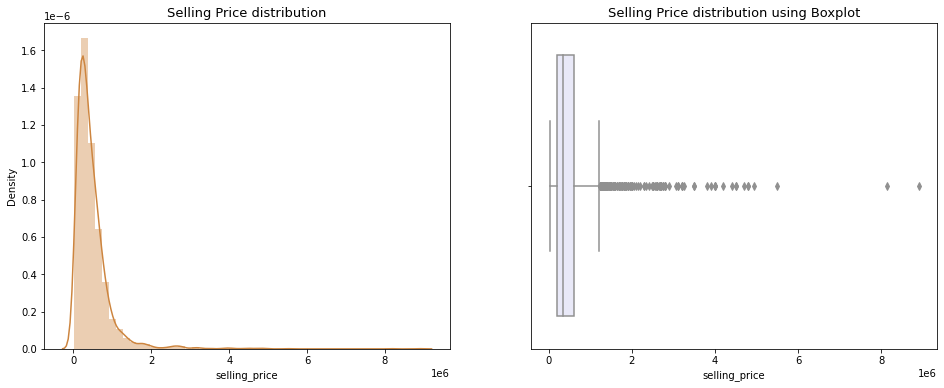

In [18]:
#----------------------------------Block 14-a--------------------------------------

#visualising distribution of selling_price
fig,axes= plt.subplots(1,2,figsize=(16,6))   #defining figure and initialising axes
sns.distplot(cardekho_cardetails_data['selling_price'],color='peru',ax=axes[0])   #distribution plot for selling_price
axes[0].set_title('Selling Price distribution',fontsize=13)   #to give title
sns.boxplot(cardekho_cardetails_data['selling_price'],color='lavender',ax=axes[1])   #boxplot showing distribution of selling_price
axes[1].set_title('Selling Price distribution using Boxplot',fontsize=13)
plt.show()

*As this feature is little right skewed so, we will apply a transformation technique to make it normally distributed*

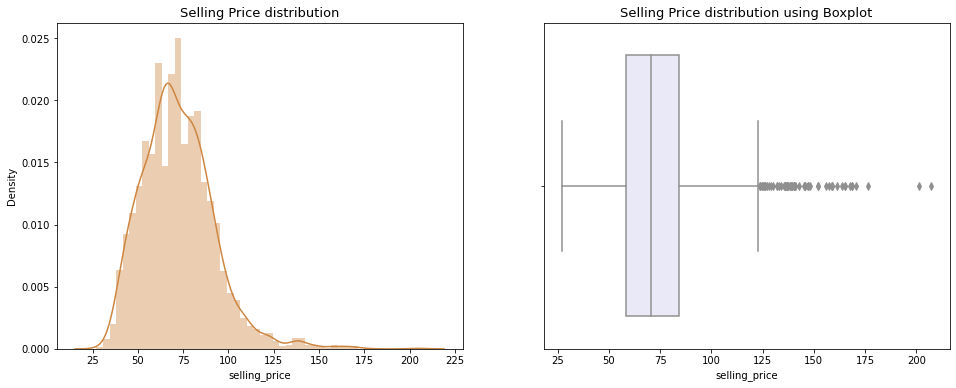

In [19]:
#----------------------------------Block 14-b--------------------------------------

#applying cube root transformation to check if it works or not
fig,axes= plt.subplots(1,2,figsize=(16,6))   #defining figure and initialising axes
#distribution plot for selling_price after cube root transformation
sns.distplot(np.cbrt(cardekho_cardetails_data['selling_price']),ax=axes[0],color='peru')   #distplot 
axes[0].set_title('Selling Price distribution',fontsize=13)   #to give title
sns.boxplot(np.cbrt(cardekho_cardetails_data['selling_price']),ax=axes[1],color='lavender')   #boxplot
axes[1].set_title('Selling Price distribution using Boxplot',fontsize=13)
plt.show()

*Now it looks fine, and also outliers has gone little less.  So, we will apply cube root transformation in selling_price. The presence of outliers in selling_price can be defined by independent variables like brand, model of that car or year, owner etc*

In [20]:
#----------------------------------Block 15--------------------------------------

cardekho_cardetails_data['selling_price'] = np.cbrt(cardekho_cardetails_data['selling_price'])   #cube root transformation of selling_price

* *Independent variable analysis*

In [21]:
#----------------------------------Block 16--------------------------------------

print(X)   #printing independent variables

['transmission', 'brand', 'fuel', 'km_driven', 'model', 'year', 'owner', 'seller_type']


*Among independent variables, we have some features which are numerical and some are categoroial. Let's categorise these in num_features and categorical_features*

In [22]:
#----------------------------------Block 17--------------------------------------

num_features = ['km_driven','year']   #storing numerical features
categorical_features = list(set(X)-set(num_features))   #storing categorical features

*1. num_features analysis*

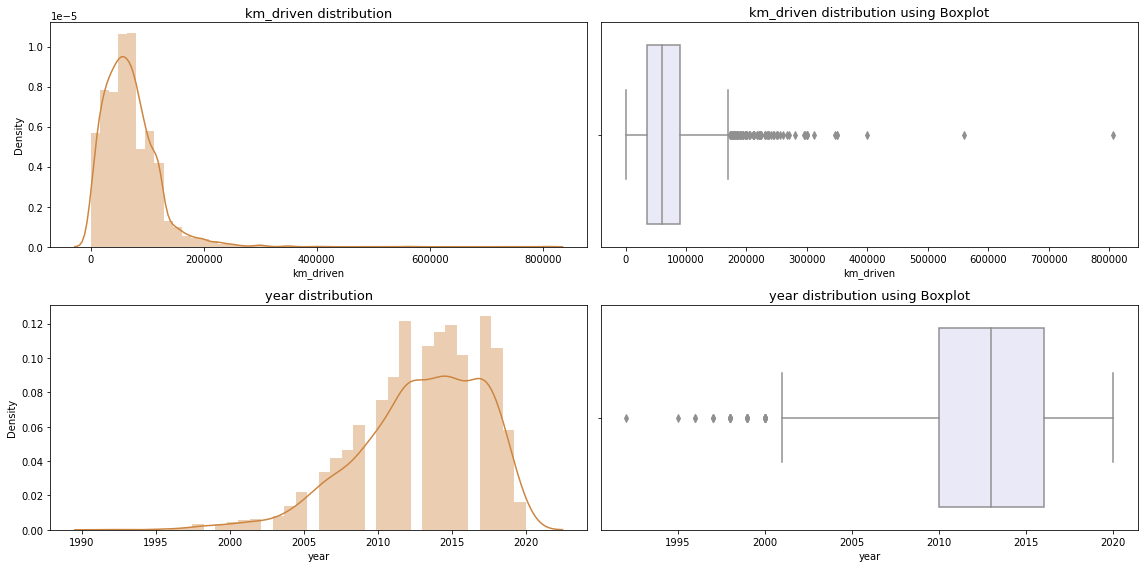

In [23]:
#----------------------------------Block 18--------------------------------------

fig,axes= plt.subplots(2,2,figsize=(16,8))   #defining figure and initialising axes
for i,col in enumerate(num_features):   #iterating over enumerate(num_features) to get index of selected feature and name of that feature 
   sns.distplot(cardekho_cardetails_data[col],ax=axes[i,0],color='peru')   #dist plot of selected feature
   axes[i,0].set_title(f'{col} distribution',fontsize=13)   #to give title
   sns.boxplot(cardekho_cardetails_data[col],ax=axes[i,1],color='lavender')   #boxplot for selected feature
   axes[i,1].set_title(f'{col} distribution using Boxplot',fontsize=13)   
fig.tight_layout() #for creating proper distance among different figures 

*we can see for 'year' feature we have data available from 1992-2020, with most of the observations between 2001-2020, that's why 1992-2000 seems like outliers here, but it's fine. We will not apply any transformation technique for 'year' feature*

*km_driven feature distribution is little skewed, let's try to transform this features to make it normally distributed*

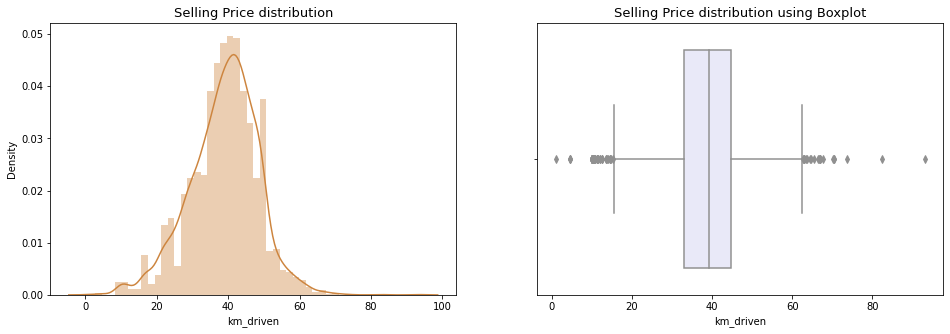

In [24]:
#----------------------------------Block 19--------------------------------------

#applying cube root transformation to check if it works or not
fig,axes= plt.subplots(1,2,figsize=(16,5))
#distribution plot for selling_price after cube root transformation
sns.distplot(np.cbrt(cardekho_cardetails_data['km_driven']),ax=axes[0],color='peru')   #distplot
axes[0].set_title('Selling Price distribution',fontsize=13)   #to give title
sns.boxplot(np.cbrt(cardekho_cardetails_data['km_driven']),ax=axes[1],color='lavender')   #boxplot
axes[1].set_title('Selling Price distribution using Boxplot',fontsize=13)    
plt.show()

*Now, it seems better. So we will apply cube root transformation in the feature*

In [25]:
#----------------------------------Block 20--------------------------------------

cardekho_cardetails_data['km_driven']=np.cbrt(cardekho_cardetails_data['km_driven'])   #cube root transformation of km_driven

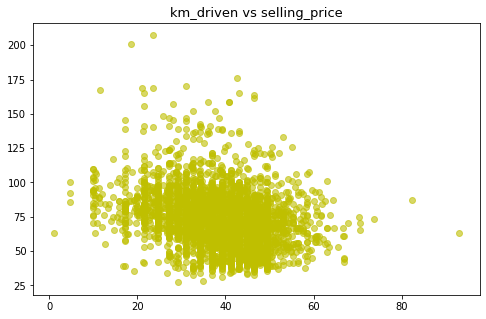

In [26]:
#----------------------------------Block 21--------------------------------------

#visualising relation between km_driven and selling_price
plt.rcParams['figure.figsize']=(8,5)   #defining figure
plt.scatter(cardekho_cardetails_data['km_driven'],cardekho_cardetails_data['selling_price'],alpha=0.6,color='y')   #scatter plot
plt.title('km_driven vs selling_price',fontsize=13)
plt.show()

*The features km_driven and selling_price seems to be negatively linearly related but have variance. The reason for the variance could be brand, model of car, owner etc*

*2. categorical_features analysis*

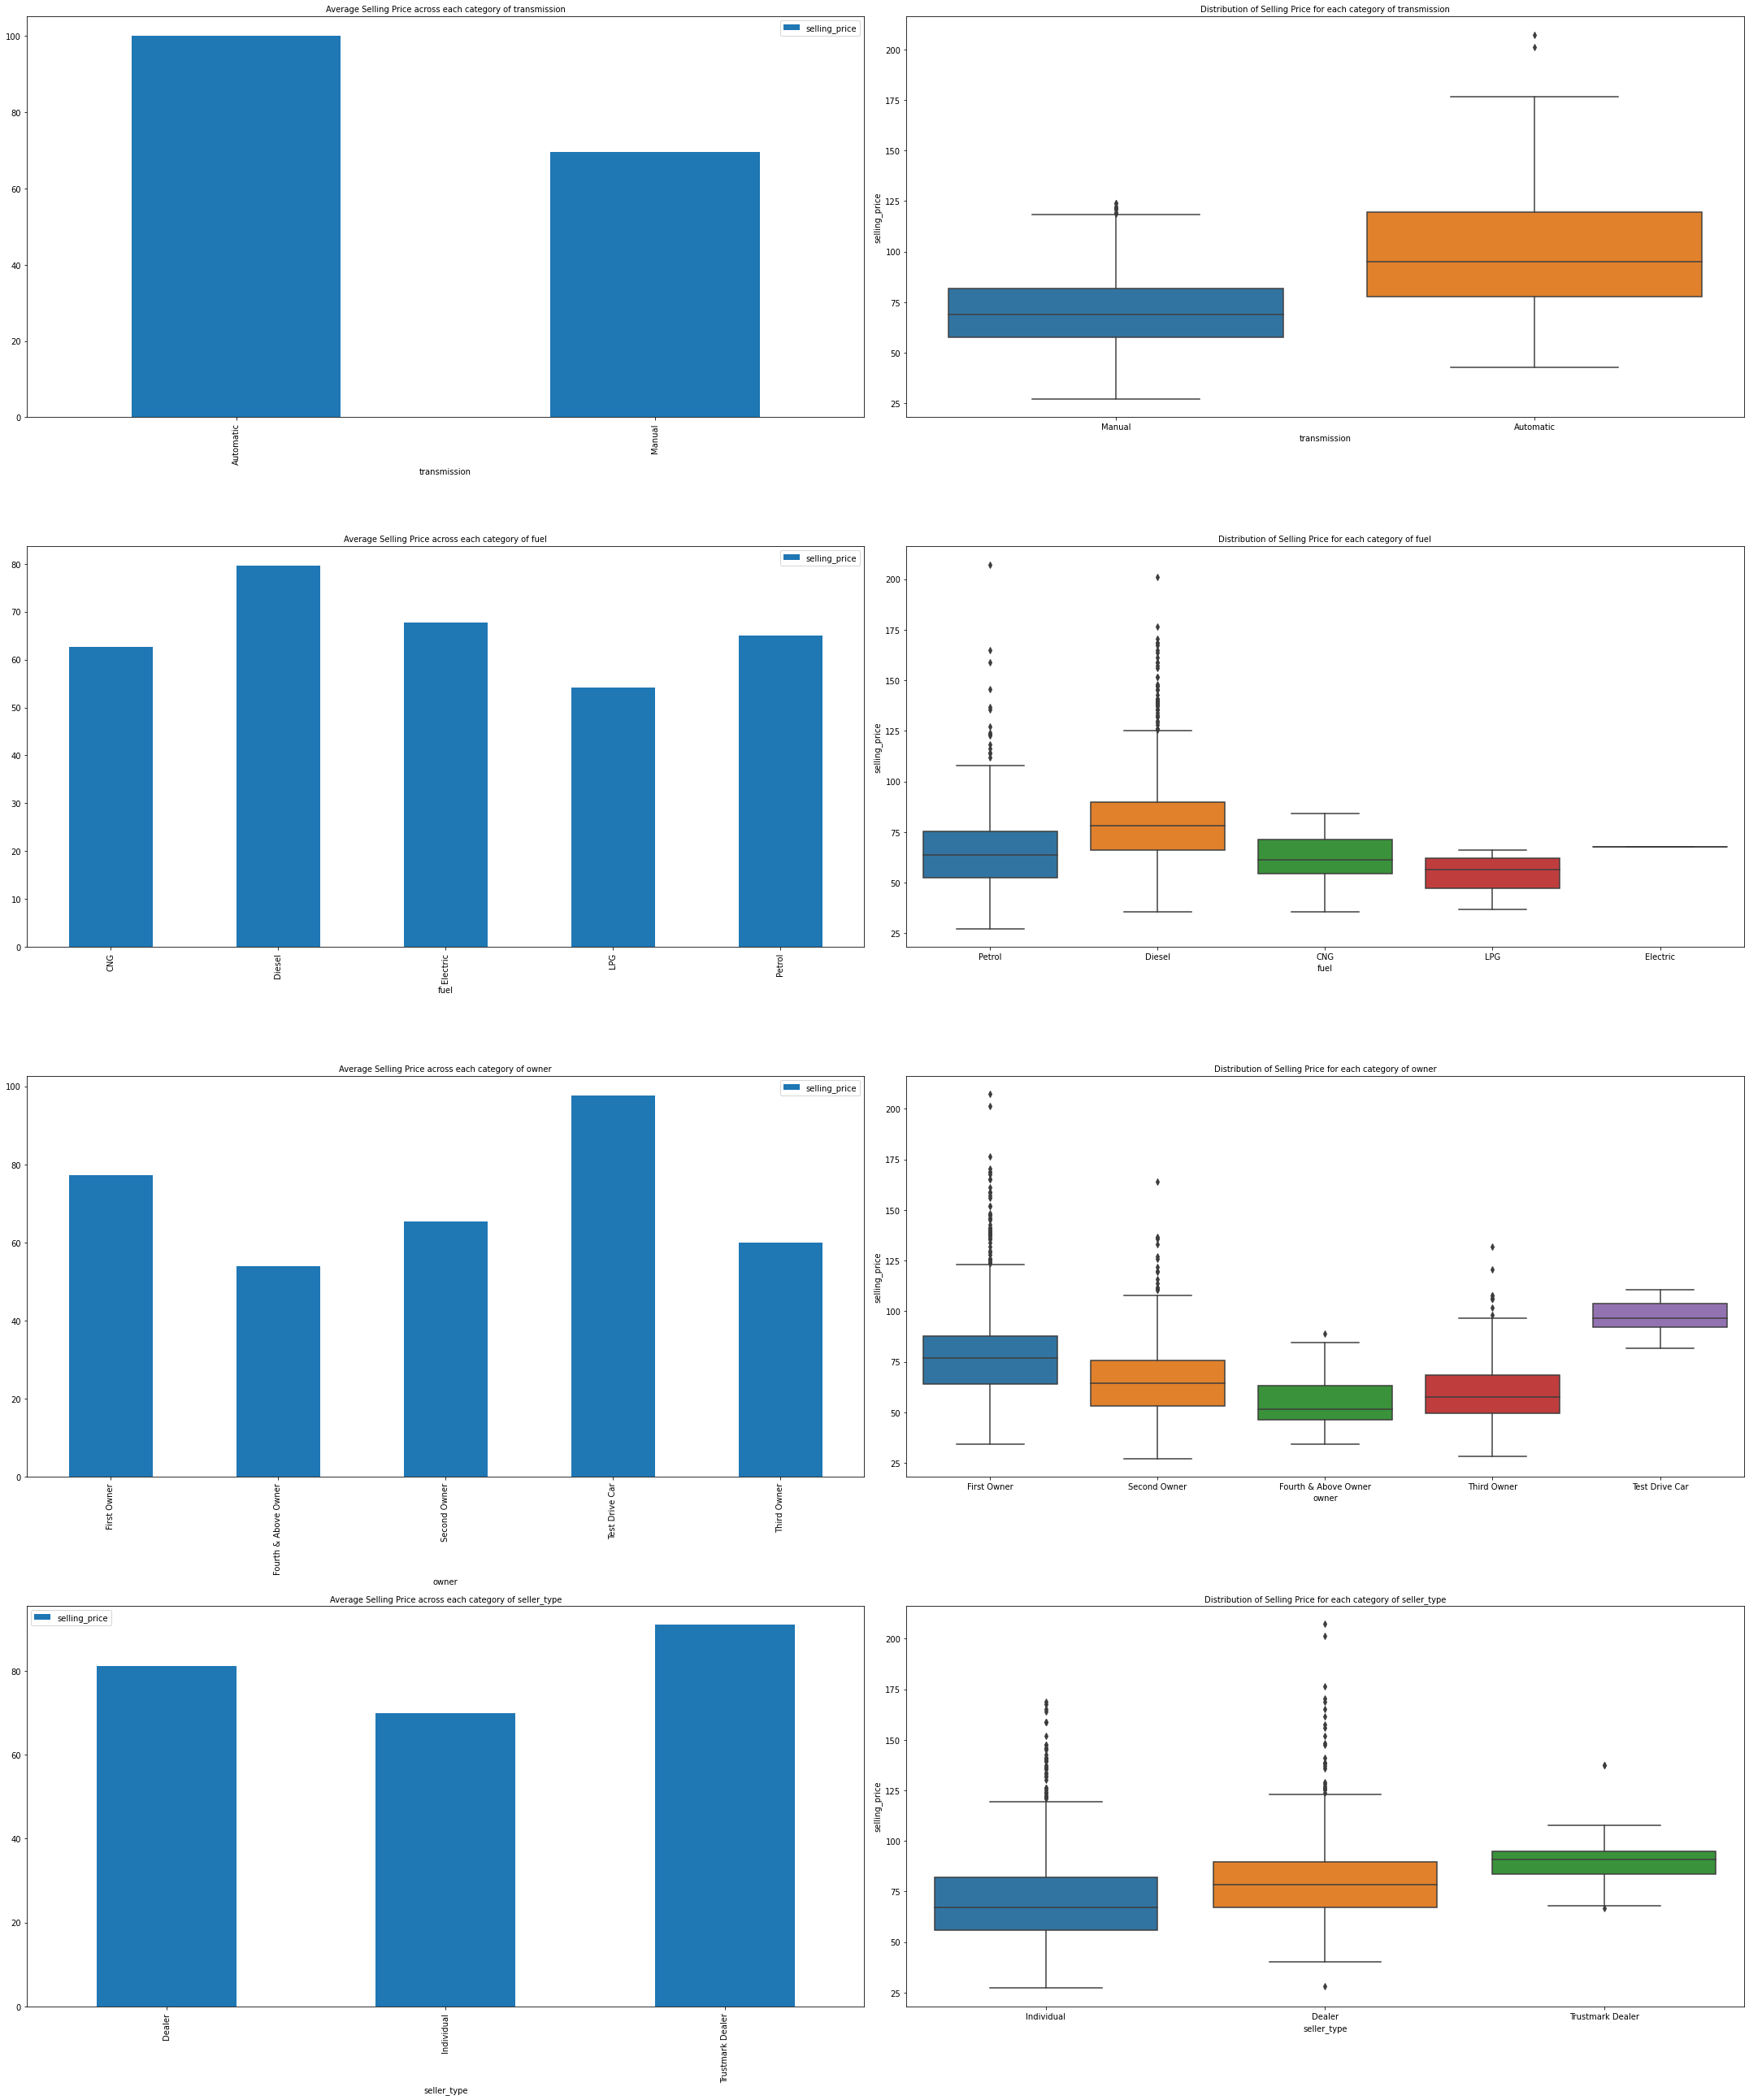

In [27]:
#----------------------------------Block 22--------------------------------------

#visualising how categorical_features (except model and brand) are related to selling price
fig,axes=plt.subplots(4,2,figsize=(30,36))   #defining figure and initialising axes
for i,col in enumerate(set(categorical_features) - set(['model','brand'])): 
  #grouping by col and calculating average selling_price for that col  
  cardekho_cardetails_data.groupby(col).agg({'selling_price':'mean'}).plot.bar(ax=axes[i,0])   #bar plot
  axes[i,0].set_title(f'Average Selling Price across each category of {col}',fontsize=10)   #to set title
  sns.boxplot(x=col,y='selling_price',data=cardekho_cardetails_data,ax=axes[i,1])   #boxplot
  axes[i,1].set_title(f'Distribution of Selling Price for each category of {col}',fontsize=10)
  fig.tight_layout() #for creating proper distance among different figures 

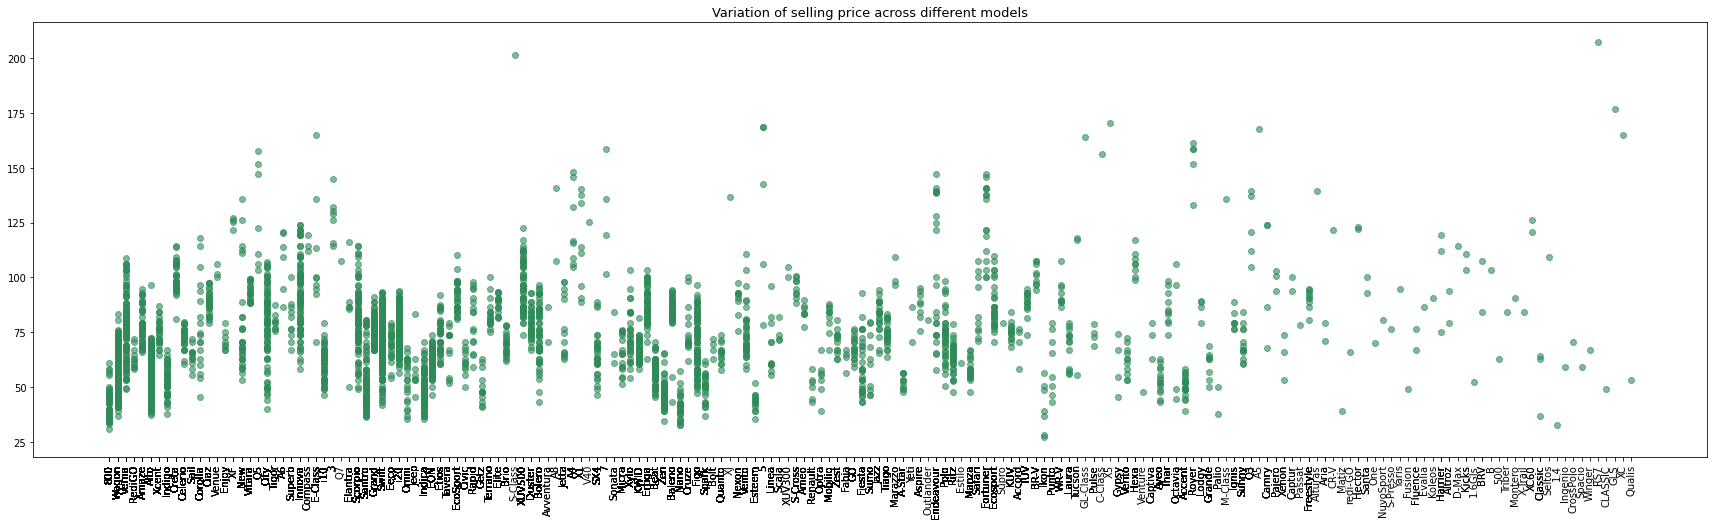

In [28]:
#----------------------------------Block 23--------------------------------------

#visualising how selling_price is varying for different models
plt.rcParams['figure.figsize']=(30,8)   #defining figure
plt.scatter(cardekho_cardetails_data['model'],cardekho_cardetails_data['selling_price'],alpha=0.6,color='seagreen')   #scatter plot
plt.title('Variation of selling price across different models',fontsize=13)
plt.xticks(list(cardekho_cardetails_data['model']),rotation = 90)   #to set x-ticks
plt.show()


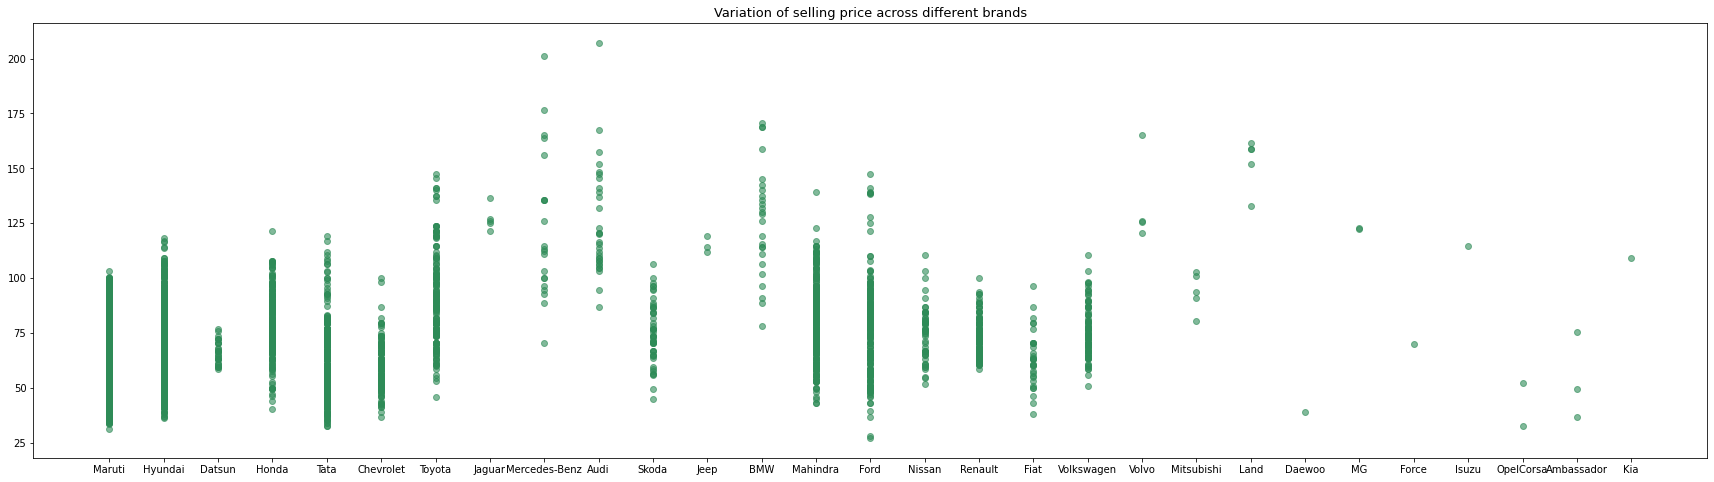

In [29]:
#----------------------------------Block 24--------------------------------------

#visualising how selling_price is varying for different brands
plt.scatter(cardekho_cardetails_data['brand'],cardekho_cardetails_data['selling_price'],alpha=0.6,color='seagreen')   #scatter plot
plt.title('Variation of selling price across different brands',fontsize=13)
plt.show()

*We can see selling price for the same model and brand is varying. We will create dummy variables for brand and model to build model*